In [1]:
import pandas as pd
from transformers import RobertaTokenizer
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json('../../Data/Preprocessed Data/kind:bug/cleaned_data_with_changed_files.json')

Analyze the label length

In [3]:
# get count of labels per row
data['label_count'] = data['labels'].apply(lambda x: len(x))

In [4]:
# count of rows with count of labels
print('Count of labels per row:')
counts = data['label_count'].value_counts().sort_index()
total = len(data)

df_counts = pd.DataFrame({'count': counts})
df_counts['percentage'] = df_counts['count'] / total * 100
df_counts['cumulative_percentage'] = df_counts['percentage'].cumsum()

# Print results with individual and cumulative percentages
for idx, row in df_counts.iterrows():
    print(f"{idx}: {row['count']} ({row['percentage']:.2f}%, cumulative: {row['cumulative_percentage']:.2f}%)")

Count of labels per row:
1: 894.0 (71.07%, cumulative: 71.07%)
2: 251.0 (19.95%, cumulative: 91.02%)
3: 46.0 (3.66%, cumulative: 94.67%)
4: 22.0 (1.75%, cumulative: 96.42%)
5: 23.0 (1.83%, cumulative: 98.25%)
6: 10.0 (0.79%, cumulative: 99.05%)
7: 6.0 (0.48%, cumulative: 99.52%)
8: 1.0 (0.08%, cumulative: 99.60%)
9: 3.0 (0.24%, cumulative: 99.84%)
13: 2.0 (0.16%, cumulative: 100.00%)


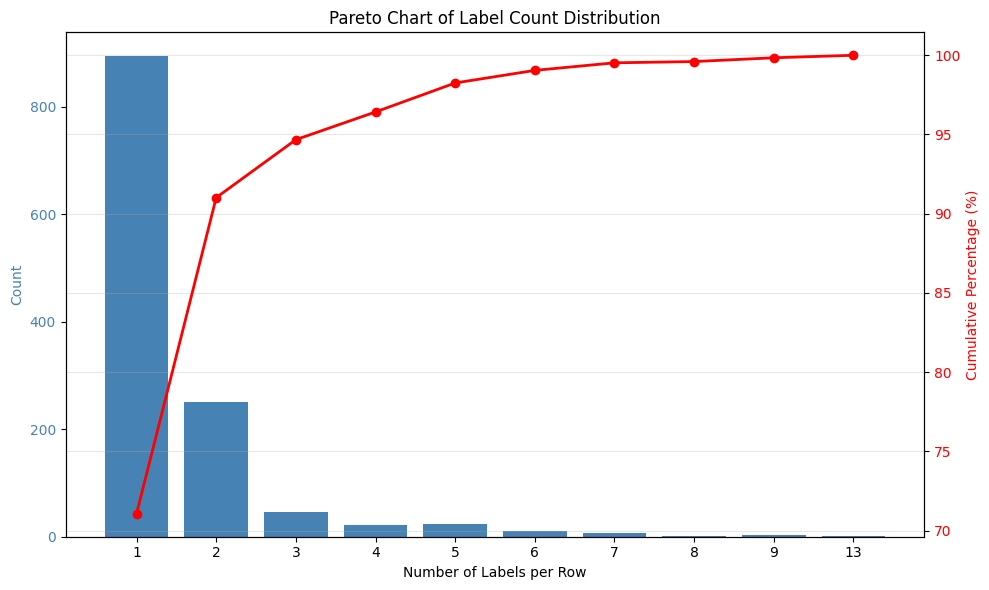

In [19]:
# Create Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for counts
ax1.bar(df_counts.index.astype(str), df_counts['count'], color='steelblue')
ax1.set_xlabel('Number of Labels per Row')
ax1.set_ylabel('Count', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(df_counts.index.astype(str), df_counts['cumulative_percentage'], 
         color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Pareto Chart of Label Count Distribution')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

Analyze the label distribution

In [20]:
# check distribution of labels
data['label_string'] = data['labels'].apply(lambda x: ', '.join(x))
label_counts = data['label_string'].value_counts().sort_values(ascending=False)
total = len(data)

df_label_counts = pd.DataFrame({'count': label_counts})
df_label_counts['percentage'] = df_label_counts['count'] / total * 100
df_label_counts['cumulative_percentage'] = df_label_counts['percentage'].cumsum()

# Print results with individual and cumulative percentages
print('\nCount of label strings:')
for i, (idx, row) in enumerate(df_label_counts.iterrows()):
    print(f"{i+1}. {idx}: {int(row['count'])} ({row['percentage']:.2f}%, cumulative: {row['cumulative_percentage']:.2f}%)")


Count of label strings:
1. area/kubelet: 276 (21.94%, cumulative: 21.94%)
2. area/test: 150 (11.92%, cumulative: 33.86%)
3. area/apiserver: 108 (8.59%, cumulative: 42.45%)
4. area/kubectl: 86 (6.84%, cumulative: 49.28%)
5. area/cloudprovider: 75 (5.96%, cumulative: 55.25%)
6. area/cloudprovider, area/provider/azure: 56 (4.45%, cumulative: 59.70%)
7. area/test, area/kubelet: 47 (3.74%, cumulative: 63.43%)
8. area/kubeadm: 35 (2.78%, cumulative: 66.22%)
9. area/test, area/apiserver: 33 (2.62%, cumulative: 68.84%)
10. area/ipvs: 29 (2.31%, cumulative: 71.14%)
11. area/provider/gcp: 22 (1.75%, cumulative: 72.89%)
12. area/test, area/kubectl: 19 (1.51%, cumulative: 74.40%)
13. area/code-generation: 18 (1.43%, cumulative: 75.83%)
14. area/dependency: 18 (1.43%, cumulative: 77.27%)
15. area/apiserver, area/kubectl, area/cloudprovider, area/code-generation, area/dependency: 18 (1.43%, cumulative: 78.70%)
16. area/kube-proxy: 16 (1.27%, cumulative: 79.97%)
17. area/test, area/e2e-test-framewor

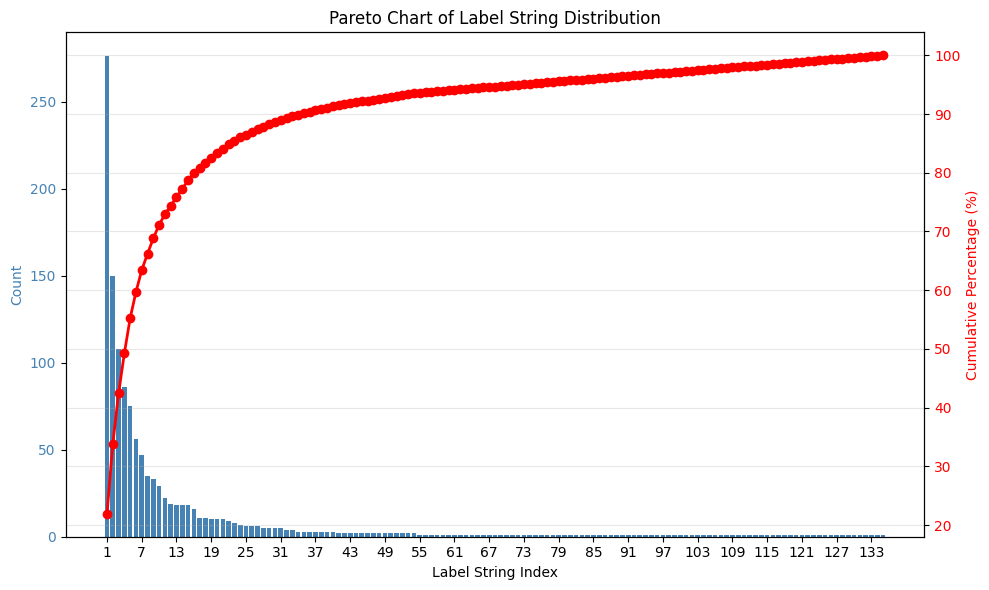

In [21]:
# Make a Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create x positions as numbers (1, 2, 3, ...)
x_pos = range(1, len(df_label_counts) + 1)

# Bar chart for counts
ax1.bar(x_pos, df_label_counts['count'], color='steelblue')
ax1.set_xlabel('Label String Index')
ax1.set_ylabel('Count', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(x_pos, df_label_counts['cumulative_percentage'], 
         color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x ticks to be integers at appropriate intervals
ax1.set_xticks(range(1, len(df_label_counts) + 1, max(1, len(df_label_counts) // 20)))

plt.title('Pareto Chart of Label String Distribution')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [22]:
# check ditstribution of labels unique values
labels = data['labels'].explode()
label_counts = labels.value_counts().sort_values(ascending=False)
total = len(labels)

df_label_counts = pd.DataFrame({'count': label_counts})
df_label_counts['percentage'] = df_label_counts['count'] / total * 100
df_label_counts['cumulative_percentage'] = df_label_counts['percentage'].cumsum()

# Print results with individual and cumulative percentages
print(f'Total unique labels: {len(df_label_counts)}')
print('\nCount of unique labels:')
for i, (idx, row) in enumerate(df_label_counts.iterrows()):
    print(f"{i+1}. {idx}: {int(row['count'])} ({row['percentage']:.2f}%, cumulative: {row['cumulative_percentage']:.2f}%)")

Total unique labels: 39

Count of unique labels:
1. area/kubelet: 384 (20.21%, cumulative: 20.21%)
2. area/test: 342 (18.00%, cumulative: 38.21%)
3. area/apiserver: 244 (12.84%, cumulative: 51.05%)
4. area/cloudprovider: 215 (11.32%, cumulative: 62.37%)
5. area/kubectl: 164 (8.63%, cumulative: 71.00%)
6. area/dependency: 94 (4.95%, cumulative: 75.95%)
7. area/code-generation: 73 (3.84%, cumulative: 79.79%)
8. area/provider/azure: 67 (3.53%, cumulative: 83.32%)
9. area/ipvs: 52 (2.74%, cumulative: 86.05%)
10. area/kubeadm: 51 (2.68%, cumulative: 88.74%)
11. area/kube-proxy: 33 (1.74%, cumulative: 90.47%)
12. area/provider/gcp: 33 (1.74%, cumulative: 92.21%)
13. area/e2e-test-framework: 30 (1.58%, cumulative: 93.79%)
14. area/release-eng: 23 (1.21%, cumulative: 95.00%)
15. area/custom-resources: 17 (0.89%, cumulative: 95.89%)
16. area/conformance: 17 (0.89%, cumulative: 96.79%)
17. area/security: 11 (0.58%, cumulative: 97.37%)
18. area/provider/vmware: 6 (0.32%, cumulative: 97.68%)
19. a

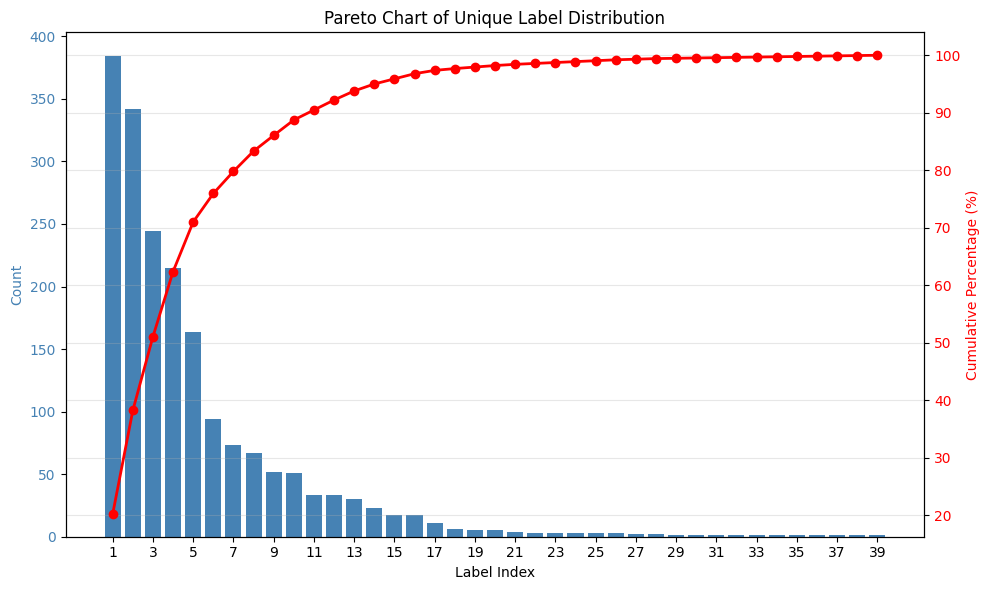

In [23]:
# Make a Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create x positions as numbers (1, 2, 3, ...)
x_pos = range(1, len(df_label_counts) + 1)

# Bar chart for counts
ax1.bar(x_pos, df_label_counts['count'], color='steelblue')
ax1.set_xlabel('Label Index')
ax1.set_ylabel('Count', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(x_pos, df_label_counts['cumulative_percentage'], 
         color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x ticks to be integers
ax1.set_xticks(range(1, len(df_label_counts) + 1, 2))  # Set ticks every 2 steps to avoid crowding

plt.title('Pareto Chart of Unique Label Distribution')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

Analyze the length of each texts

In [24]:
# get the length of all_text
data['all_text_length'] = data['all_text'].apply(lambda x: len(x))
data['all_text_length_0.5'] = data['all_text_0.5'].apply(lambda x: len(x))
data['all_text_length_0.6'] = data['all_text_0.6'].apply(lambda x: len(x))
data['all_text_length_0.7'] = data['all_text_0.7'].apply(lambda x: len(x))
data['all_text_length_0.8'] = data['all_text_0.8'].apply(lambda x: len(x))
data['all_text_length_0.9'] = data['all_text_0.9'].apply(lambda x: len(x))

In [25]:
# get the summary statistics of all_text_length
for each in ['all_text_length', 'all_text_length_0.5', 'all_text_length_0.6', 'all_text_length_0.7', 'all_text_length_0.8', 'all_text_length_0.9']:
    print(f"\nSummary statistics for {each}:")
    print(data[each].describe())


Summary statistics for all_text_length:
count      1258.000000
mean       6583.286963
std        8916.671384
min         248.000000
25%        2140.500000
50%        3930.000000
75%        7787.250000
max      123846.000000
Name: all_text_length, dtype: float64

Summary statistics for all_text_length_0.5:
count     1258.000000
mean      2797.413355
std       3383.080850
min        120.000000
25%        948.500000
50%       1782.000000
75%       3383.250000
max      43163.000000
Name: all_text_length_0.5, dtype: float64

Summary statistics for all_text_length_0.6:
count     1258.000000
mean      2921.379173
std       3477.965359
min        132.000000
25%       1019.500000
50%       1897.000000
75%       3560.750000
max      43576.000000
Name: all_text_length_0.6, dtype: float64

Summary statistics for all_text_length_0.7:
count     1258.000000
mean      2997.749603
std       3523.043010
min        164.000000
25%       1062.250000
50%       1950.500000
75%       3649.000000
max      444

In [26]:
# tokenize the all_text using codeBERT tokenizer
tokenizer = RobertaTokenizer.from_pretrained('microsoft/codebert-base')

for each in ['all_text', 'all_text_0.5', 'all_text_0.6', 'all_text_0.7', 'all_text_0.8', 'all_text_0.9']:
    print(f"\nTokenizing {each}...")
    data[f'{each}_tokenized'] = data[each].apply(lambda x: tokenizer(x)['input_ids'])

Token indices sequence length is longer than the specified maximum sequence length for this model (13090 > 512). Running this sequence through the model will result in indexing errors



Tokenizing all_text...

Tokenizing all_text_0.5...

Tokenizing all_text_0.6...

Tokenizing all_text_0.7...

Tokenizing all_text_0.8...

Tokenizing all_text_0.9...


In [27]:
data.columns

Index(['all_text', 'all_text_0.5', 'all_text_0.6', 'all_text_0.7',
       'all_text_0.8', 'all_text_0.9', 'labels', 'filename', 'status',
       'additions', 'deletions', 'changes', 'label_count', 'label_string',
       'all_text_length', 'all_text_length_0.5', 'all_text_length_0.6',
       'all_text_length_0.7', 'all_text_length_0.8', 'all_text_length_0.9',
       'all_text_tokenized', 'all_text_0.5_tokenized',
       'all_text_0.6_tokenized', 'all_text_0.7_tokenized',
       'all_text_0.8_tokenized', 'all_text_0.9_tokenized'],
      dtype='object')

In [28]:
for each in ['all_text_tokenized', 'all_text_0.5_tokenized', 'all_text_0.6_tokenized', 'all_text_0.7_tokenized', 'all_text_0.8_tokenized', 'all_text_0.9_tokenized']:
    all_text_tokenized_length = data[each].apply(lambda x: len(x))
    print(f"\nSummary statistics for {each}:")
    print(all_text_tokenized_length.describe())


Summary statistics for all_text_tokenized:
count     1258.000000
mean      2613.558029
std       4088.849056
min         84.000000
25%        768.000000
50%       1458.000000
75%       2914.000000
max      49264.000000
Name: all_text_tokenized, dtype: float64

Summary statistics for all_text_0.5_tokenized:
count     1258.000000
mean       666.314785
std        875.517377
min         32.000000
25%        208.000000
50%        404.000000
75%        803.500000
max      12438.000000
Name: all_text_0.5_tokenized, dtype: float64

Summary statistics for all_text_0.6_tokenized:
count     1258.000000
mean       690.499205
std        892.749707
min         33.000000
25%        220.250000
50%        426.500000
75%        832.000000
max      12532.000000
Name: all_text_0.6_tokenized, dtype: float64

Summary statistics for all_text_0.7_tokenized:
count     1258.000000
mean       712.124006
std        904.724292
min         49.000000
25%        237.000000
50%        441.500000
75%        859.750000